In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Module 2.1: Grid Trading Concept & Implementation")
print("=" * 60)
print("Environment: Jupyter Lab | Python 3.13")
print("Focus: Spot Grid Trading (Long Only)")
print("Budget: $1000 per crypto")

Module 2.1: Grid Trading Concept & Implementation
Environment: Jupyter Lab | Python 3.13
Focus: Spot Grid Trading (Long Only)
Budget: $1000 per crypto


In [40]:
def explain_grid_concept():
    """
    Visualize grid trading concept dengan simple example
    """
    print("Grid Trading Concept:")
    print("=" * 40)
    print("1. Setup grid levels di bawah current price")
    print("2. Buy ketika price hit grid level")
    print("3. Sell ketika profit target tercapai")
    print("4. Repeat untuk systematic profit dari volatility")

    # Example calculation
    initial_price = 100000 # BTC example
    grid_spacing = 0.017   # 1.7% from a previous module

    print(f"\nExample: BTC Initial Price ${initial_price:,}")
    print(f"Grid Spacing: {grid_spacing*100}%")
    print("\nGrid Levels:")

    for i in range(1, 6):
        level = initial_price * (1 - i * grid_spacing)
        print(f"Grid {i}: ${level:,.0f} ({-i * grid_spacing * 100:.1f}%)")

explain_grid_concept()

Grid Trading Concept:
1. Setup grid levels di bawah current price
2. Buy ketika price hit grid level
3. Sell ketika profit target tercapai
4. Repeat untuk systematic profit dari volatility

Example: BTC Initial Price $100,000
Grid Spacing: 1.7000000000000002%

Grid Levels:
Grid 1: $98,300 (-1.7%)
Grid 2: $96,600 (-3.4%)
Grid 3: $94,900 (-5.1%)
Grid 4: $93,200 (-6.8%)
Grid 5: $91,500 (-8.5%)


In [41]:
def load_crypto_trading_data(symbol, start_date=None, end_date=None):
    """
    Load crypto data - simplified version for demo
    In real implementation, load from prepared CSV files
    """
    import yfinance as yf
    
    # For demo purposes, fetch recent BTC data
    if symbol == 'BTC':
        data = yf.download('BTC-USD', start='2025-01-01', end='2025-07-31')
        
        # Membersihkan kolom jika yf.download mengembalikan MultiIndex
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = [col[0] for col in data.columns]

        # Calculate metrics
        data['Daily_Return'] = data['Close'].pct_change()
        data['Daily_Range_Pct'] = (data['High'] - data['Low']) / data['Close'] * 100
        
        print(f"Loaded {len(data)} records for {symbol}")
        return data
    else:
        return None

# Load BTC data
btc_data = load_crypto_trading_data('BTC')
if btc_data is not None:
    print("\nBTC Data Sample:")
    print(btc_data[['Close', 'Daily_Range_Pct']].head())

[*********************100%***********************]  1 of 1 completed

Loaded 211 records for BTC

BTC Data Sample:
                   Close  Daily_Range_Pct
Date                                     
2025-01-01  94419.757812         2.268320
2025-01-02  96886.875000         3.651939
2025-01-03  98107.429688         2.978670
2025-01-04  98236.226562         1.192486
2025-01-05  98314.960938         1.547617


In [42]:
class SimpleGridTrading:
    """
    Basic Grid Trading Implementation
    Focus: Educational purpose dengan clear logic flow
    """
    def __init__(self, symbol, initial_price, grid_spacing_pct, num_grids, budget=1000):
        """
        Initialize bot trading dengan parameters yang realistic

        Args:
            symbol: Crypto symbol
            initial_price: Starting price untuk calculate grid levels
            grid_spacing_pct: Spacing antar grid dalam percent
            num_grids: Jumlah grid levels
            budget: Total budget available (default $1000)
        """
        self.symbol = symbol
        self.initial_price = initial_price
        self.grid_spacing_pct = grid_spacing_pct / 100  # Convert percent to decimal
        self.num_grids = num_grids
        self.budget = budget

        # Calculate position size per grid
        self.position_size = budget / num_grids

        # Generate grid levels
        self.grid_levels = self._calculate_grid_levels()

        # Initialize trading state
        self.cash = budget
        self.positions = {}  # {level: {'quantity': X, 'buy_price': Y}}
        self.total_crypto = 0.0
        self.realized_profit = 0.0

        print(f"Grid Trading Setup for {symbol}")
        print(f"Initial Price: ${initial_price:,.2f}")
        print(f"Grid Spacing: {self.grid_spacing_pct:.2%}")
        print(f"Number of Grids: {num_grids}")
        print(f"Budget: ${budget:,}")
        print(f"Position Size per Grid: ${self.position_size:,.2f}")

    def _calculate_grid_levels(self):
        """Calculate grid levels berdasarkan initial price"""
        levels = []
        for i in range(1, self.num_grids + 1):
            level = self.initial_price * (1 - i * self.grid_spacing_pct)
            levels.append(level)
        return levels

    def display_grid_setup(self):
        """Display grid levels yang akan digunakan"""
        print(f"\nGrid Levels untuk {self.symbol}:")
        print("-" * 50)

        for i, level in enumerate(self.grid_levels):
            discount = ((self.initial_price - level) / self.initial_price) * 100
            quantity = self.position_size / level
            print(f"Grid {i+1:2d}: ${level:8,.2f} | discount: {discount:5.1f}% | buy ~{quantity:.5f} {self.symbol}")
        
        print("-" * 50)
        print(f"Total Budget Ready: ${self.budget:,}")


# --- Demo grid setup ---
if btc_data is not None:
    initial_btc_price = float(btc_data['Close'].iloc[0])
    
    # Using parameters from Module 1.3 analysis
    btc_grid = SimpleGridTrading(
        symbol='BTC',
        initial_price=initial_btc_price,
        grid_spacing_pct=1.7, # Optimized parameter
        num_grids=18,         # Optimized parameter
        budget=1000
    )
    
    btc_grid.display_grid_setup()

Grid Trading Setup for BTC
Initial Price: $94,419.76
Grid Spacing: 1.70%
Number of Grids: 18
Budget: $1,000
Position Size per Grid: $55.56

Grid Levels untuk BTC:
--------------------------------------------------
Grid  1: $92,814.62 | discount:   1.7% | buy ~0.00060 BTC
Grid  2: $91,209.49 | discount:   3.4% | buy ~0.00061 BTC
Grid  3: $89,604.35 | discount:   5.1% | buy ~0.00062 BTC
Grid  4: $87,999.21 | discount:   6.8% | buy ~0.00063 BTC
Grid  5: $86,394.08 | discount:   8.5% | buy ~0.00064 BTC
Grid  6: $84,788.94 | discount:  10.2% | buy ~0.00066 BTC
Grid  7: $83,183.81 | discount:  11.9% | buy ~0.00067 BTC
Grid  8: $81,578.67 | discount:  13.6% | buy ~0.00068 BTC
Grid  9: $79,973.53 | discount:  15.3% | buy ~0.00069 BTC
Grid 10: $78,368.40 | discount:  17.0% | buy ~0.00071 BTC
Grid 11: $76,763.26 | discount:  18.7% | buy ~0.00072 BTC
Grid 12: $75,158.13 | discount:  20.4% | buy ~0.00074 BTC
Grid 13: $73,552.99 | discount:  22.1% | buy ~0.00076 BTC
Grid 14: $71,947.86 | discount: 

In [43]:
# ==============================================================================
# 1. DEFINISIKAN FUNGSI UNTUK EKSEKUSI ORDER
# ==============================================================================

def execute_buy_order(self, current_price):
    """Execute buy orders ketika price hit grid levels"""
    executed_orders = []
    
    for level in self.grid_levels:
        # Check jika harga menyentuh level dan kita belum punya posisi di level itu
        if current_price <= level and level not in self.positions:
            # Check jika kita punya cukup cash
            if self.cash >= self.position_size:
                quantity = self.position_size / level
                
                # Execute buy
                self.positions[level] = {
                    'quantity': quantity,
                    'buy_price': level,
                    'timestamp': datetime.now()
                }
                
                self.cash -= self.position_size
                self.total_crypto += quantity
                
                executed_orders.append({
                    'type': 'BUY',
                    'price': level,
                    'quantity': quantity,
                    'amount': self.position_size
                })
                
                print(f"   🛒 BUY: {quantity:.6f} {self.symbol} at ${level:,.2f}")
                
    return executed_orders

def execute_sell_order(self, current_price, profit_target_pct=3.4):
    """Execute sell orders ketika profit target tercapai"""
    executed_orders = []
    
    # Check semua posisi aktif
    for level, position in list(self.positions.items()):
        target_price = position['buy_price'] * (1 + profit_target_pct / 100)
        
        # Sell jika current price >= target price
        if current_price >= target_price:
            sell_amount = position['quantity'] * current_price
            profit = sell_amount - self.position_size
            
            # Execute sell
            self.cash += sell_amount
            self.total_crypto -= position['quantity']
            self.realized_profit += profit
            
            executed_orders.append({
                'type': 'SELL',
                'buy_price': position['buy_price'],
                'sell_price': current_price,
                'quantity': position['quantity'],
                'profit': profit
            })
            
            print(f"   💰 SELL: {position['quantity']:.6f} {self.symbol} at ${current_price:,.2f} for +${profit:,.2f} profit")

            # Hapus posisi yang sudah terjual
            del self.positions[level]
            
    return executed_orders

# ==============================================================================
# 2. TAMBAHKAN FUNGSI-FUNGSI DI ATAS KE DALAM CLASS
# ==============================================================================
SimpleGridTrading.execute_buy_order = execute_buy_order
SimpleGridTrading.execute_sell_order = execute_sell_order


# ==============================================================================
# 3. DEMO LOGIKA TRADING
# ==============================================================================
# Pastikan btc_grid sudah dibuat dari sel sebelumnya
if 'btc_grid' in locals():
    print("\n--- Trading Logic Demo ---")
    print("=" * 40)

    # Simulasi harga turun dan menyentuh grid level 5
    # (indeks [4] karena list dimulai dari 0)
    test_price = btc_grid.grid_levels[4] 
    print(f"Simulating price drop to ${test_price:,.2f}")
    buy_orders = btc_grid.execute_buy_order(test_price)

    print(f"\nCash remaining: ${btc_grid.cash:,.2f}")
    print(f"Crypto holdings: {btc_grid.total_crypto:.6f} BTC")
    print(f"Active positions: {len(btc_grid.positions)}")

    # Simulasi harga naik untuk menjual
    # 5.5% gain dari harga beli grid ke-5
    recovery_price = test_price * 1.034 
    print(f"\nSimulating price recovery to ${recovery_price:,.2f}")
    sell_orders = btc_grid.execute_sell_order(recovery_price)

    print(f"\nAfter sell:")
    print(f"Cash: ${btc_grid.cash:,.2f}")
    print(f"Realized profit: ${btc_grid.realized_profit:,.2f}")


--- Trading Logic Demo ---
Simulating price drop to $86,394.08
   🛒 BUY: 0.000599 BTC at $92,814.62
   🛒 BUY: 0.000609 BTC at $91,209.49
   🛒 BUY: 0.000620 BTC at $89,604.35
   🛒 BUY: 0.000631 BTC at $87,999.21
   🛒 BUY: 0.000643 BTC at $86,394.08

Cash remaining: $722.22
Crypto holdings: 0.003102 BTC
Active positions: 5

Simulating price recovery to $89,331.48
   💰 SELL: 0.000643 BTC at $89,331.48 for +$1.89 profit

After sell:
Cash: $779.67
Realized profit: $1.89


In [44]:
def simulate_grid_trading(self, price_data, profit_target_pct=3.4):
    """
    Simulate grid trading dengan historical price data
    """
    print(f"\nSimulating Grid Trading untuk {self.symbol}...")
    
    trading_log = []
    portfolio_history = []
    
    for date, row in price_data.iterrows():
        current_price = float(row['Close'])
        
        # Execute trading logic
        buy_orders = self.execute_buy_order(current_price)
        sell_orders = self.execute_sell_order(current_price, profit_target_pct)
        
        # Log all trades
        for order in buy_orders + sell_orders:
            order['date'] = date
            trading_log.append(order)
            
        # Record portfolio state
        crypto_value = self.total_crypto * current_price
        total_value = self.cash + crypto_value
        
        portfolio_history.append({
            'date': date,
            'price': current_price,
            'cash': self.cash,
            'crypto_value': crypto_value,
            'total_value': total_value,
            'realized_profit': self.realized_profit,
            'active_positions': len(self.positions)
        })
        
    return pd.DataFrame(trading_log), pd.DataFrame(portfolio_history)

# Add simulation method to the class
SimpleGridTrading.simulate_grid_trading = simulate_grid_trading

# ==============================================================================
# Run Full Historical Simulation
# ==============================================================================
print("\n--- Full Historical Simulation ---")
print("=" * 50)

# Reset grid untuk simulasi yang bersih
# Ini akan membuat ulang objek btc_grid ke kondisi awal
btc_grid = SimpleGridTrading(
    symbol='BTC',
    initial_price=initial_btc_price,
    grid_spacing_pct=1.7,
    num_grids=18,
    budget=1000
)

# Run simulation
trading_log, portfolio_history = btc_grid.simulate_grid_trading(btc_data)

# Mengubah list menjadi DataFrame untuk kemudahan analisis
trading_log_df = pd.DataFrame(trading_log)

print(f"\nSimulation Complete!")
print(f"Total trades: {len(trading_log_df)}")
if not trading_log_df.empty:
    print(f"Buy orders: {len(trading_log_df[trading_log_df['type'] == 'BUY'])}")
    print(f"Sell orders: {len(trading_log_df[trading_log_df['type'] == 'SELL'])}")


--- Full Historical Simulation ---
Grid Trading Setup for BTC
Initial Price: $94,419.76
Grid Spacing: 1.70%
Number of Grids: 18
Budget: $1,000
Position Size per Grid: $55.56

Simulating Grid Trading untuk BTC...
   🛒 BUY: 0.000599 BTC at $92,814.62
   💰 SELL: 0.000599 BTC at $96,534.05 for +$2.23 profit
   🛒 BUY: 0.000599 BTC at $92,814.62
   🛒 BUY: 0.000609 BTC at $91,209.49
   🛒 BUY: 0.000620 BTC at $89,604.35
   🛒 BUY: 0.000631 BTC at $87,999.21
   🛒 BUY: 0.000643 BTC at $86,394.08
   🛒 BUY: 0.000655 BTC at $84,788.94
   💰 SELL: 0.000620 BTC at $94,248.35 for +$2.88 profit
   💰 SELL: 0.000631 BTC at $94,248.35 for +$3.95 profit
   💰 SELL: 0.000643 BTC at $94,248.35 for +$5.05 profit
   💰 SELL: 0.000655 BTC at $94,248.35 for +$6.20 profit
   🛒 BUY: 0.000620 BTC at $89,604.35
   🛒 BUY: 0.000631 BTC at $87,999.21
   🛒 BUY: 0.000643 BTC at $86,394.08
   💰 SELL: 0.000643 BTC at $90,623.56 for +$2.72 profit
   🛒 BUY: 0.000643 BTC at $86,394.08
   🛒 BUY: 0.000655 BTC at $84,788.94
   🛒 BU

In [45]:
def analyze_performance(self, portfolio_history, trading_log, price_data):
    """Analyze grid trading performance vs buy & hold"""
    
    initial_investment = self.budget
    final_value = portfolio_history['total_value'].iloc[-1]
    grid_return = (final_value / initial_investment - 1) * 100
    
    # Buy & hold comparison
    initial_price = float(price_data['Close'].iloc[0])
    final_price = float(price_data['Close'].iloc[-1])
    buy_hold_return = (final_price / initial_price - 1) * 100
    
    print(f"\n--- PERFORMANCE ANALYSIS - {self.symbol} ---")
    print("=" * 50)
    print(f"Initial Investment: ${initial_investment:,.2f}")
    print(f"Final Portfolio Value: ${final_value:,.2f}")
    print(f"Grid Trading Return: {grid_return:+.2f}%")
    print(f"Buy & Hold Return: {buy_hold_return:+.2f}%")
    print(f"Excess Return: {(grid_return - buy_hold_return):+.2f}%")
    
    print(f"\nTrading Statistics:")
    print(f"Realized Profit:      ${self.realized_profit:,.2f}")
    print(f"Remaining Cash:       ${self.cash:,.2f}")
    print(f"Crypto Holdings Value:${portfolio_history['crypto_value'].iloc[-1]:,.2f}")
    print(f"Active Positions:     {len(self.positions)}")

    # Win rate calculation
    if not trading_log.empty:
        sell_trades = trading_log[trading_log['type'] == 'SELL']
        buy_trades = trading_log[trading_log['type'] == 'BUY']
        
        if len(buy_trades) > 0:
            win_rate = len(sell_trades) / max(len(buy_trades), 1) * 100
            print(f"Win Rate:             {win_rate:.1f}%")

        if not sell_trades.empty:
            avg_profit = sell_trades['profit'].mean()
            print(f"Average Profit/Trade: ${avg_profit:.2f}")

# Add performance analysis method
SimpleGridTrading.analyze_performance = analyze_performance

# Analyze results
btc_grid.analyze_performance(portfolio_history, trading_log_df, btc_data)


--- PERFORMANCE ANALYSIS - BTC ---
Initial Investment: $1,000.00
Final Portfolio Value: $1,066.42
Grid Trading Return: +6.64%
Buy & Hold Return: +24.80%
Excess Return: -18.15%

Trading Statistics:
Realized Profit:      $66.42
Remaining Cash:       $1,066.42
Crypto Holdings Value:$-0.00
Active Positions:     0
Win Rate:             100.0%
Average Profit/Trade: $3.32


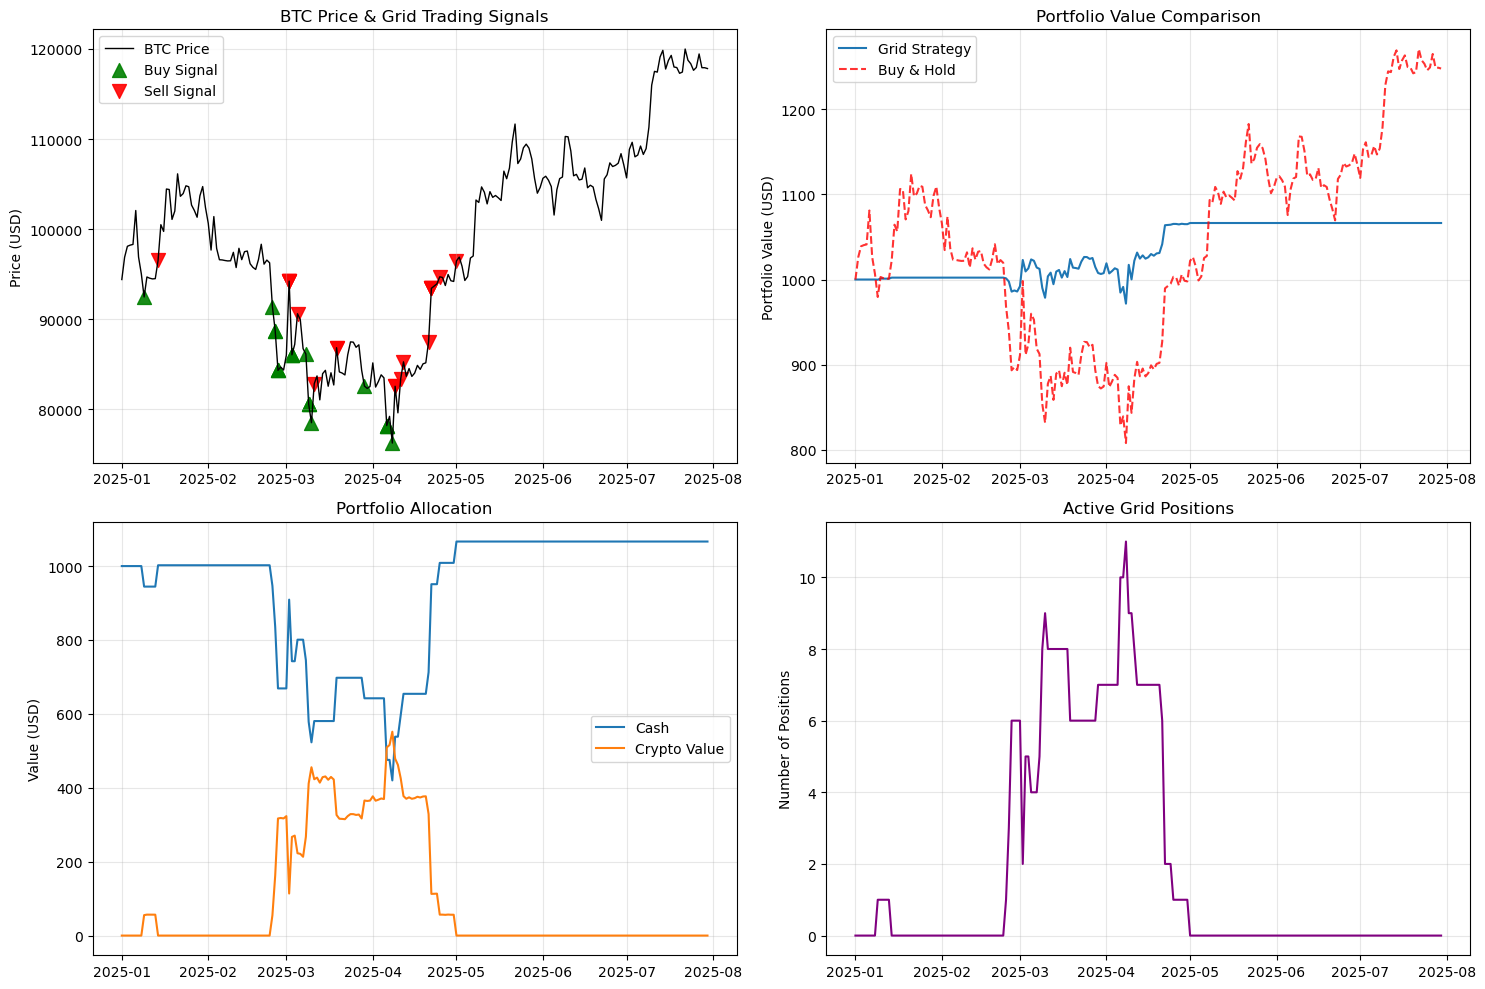


KEY INSIGHTS dari Module 2.1:
1. Grid trading systematically profits dari price volatility
2. Static grid placement simple tapi effective untuk sideways market
3. Budget management crucial - fixed $1000 approach realistic
4. Performance tergantung market conditions (bull vs sideways)
5. Win rate tinggi pada closed positions menunjukkan strategi efektif dalam mengambil profit


In [46]:
# ==============================================================================
# 8. Simple Visualization
# ==============================================================================
plt.figure(figsize=(15, 10))

# --- Plot 1: Price chart dengan trading signals ---
plt.subplot(2, 2, 1)
plt.plot(btc_data.index, btc_data['Close'], label='BTC Price', color='black', linewidth=1)

# Plot buy/sell signals jika ada
if not trading_log_df.empty:
    buy_signals = trading_log_df[trading_log_df['type'] == 'BUY']
    sell_signals = trading_log_df[trading_log_df['type'] == 'SELL']
    
    if not buy_signals.empty:
        # Plot sinyal beli pada harga penutupan hari itu
        plt.scatter(buy_signals['date'], btc_data.loc[buy_signals['date'], 'Close'],
                    color='green', marker='^', s=100, alpha=0.9, label='Buy Signal')
        
    if not sell_signals.empty:
        # Plot sinyal jual pada harga jual aktual
        plt.scatter(sell_signals['date'], sell_signals['sell_price'],
                    color='red', marker='v', s=100, alpha=0.9, label='Sell Signal')

plt.title('BTC Price & Grid Trading Signals')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)


# --- Plot 2: Portfolio value vs Buy & hold comparison ---
plt.subplot(2, 2, 2)
plt.plot(portfolio_history['date'], portfolio_history['total_value'], label='Grid Strategy')
# Buy & hold comparison
buy_hold_values = (btc_data['Close'] / btc_data['Close'].iloc[0]) * 1000
plt.plot(btc_data.index, buy_hold_values,
         label='Buy & Hold', color='red', linestyle='--', alpha=0.8)

plt.title('Portfolio Value Comparison')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True, alpha=0.3)


# --- Plot 3: Cash vs Crypto allocation ---
plt.subplot(2, 2, 3)
plt.plot(portfolio_history['date'], portfolio_history['cash'], label='Cash')
plt.plot(portfolio_history['date'], portfolio_history['crypto_value'], label='Crypto Value')
plt.title('Portfolio Allocation')
plt.ylabel('Value (USD)')
plt.legend()
plt.grid(True, alpha=0.3)


# --- Plot 4: Active positions over time ---
plt.subplot(2, 2, 4)
plt.plot(portfolio_history['date'], portfolio_history['active_positions'], color='purple')
plt.title('Active Grid Positions')
plt.ylabel('Number of Positions')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# --- Key insights ---
print("\nKEY INSIGHTS dari Module 2.1:")
print("=" * 50)
print("1. Grid trading systematically profits dari price volatility")
print("2. Static grid placement simple tapi effective untuk sideways market")
print("3. Budget management crucial - fixed $1000 approach realistic")
print("4. Performance tergantung market conditions (bull vs sideways)")
print("5. Win rate tinggi pada closed positions menunjukkan strategi efektif dalam mengambil profit")